In [2]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('train.csv', index_col = 'PassengerId')

In [5]:
table = data.describe(include = "all")
table

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Baxter, Mr. Quigg Edmond",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
num_features_null = data.isnull().sum()
print(num_features_null)


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


<AxesSubplot:>

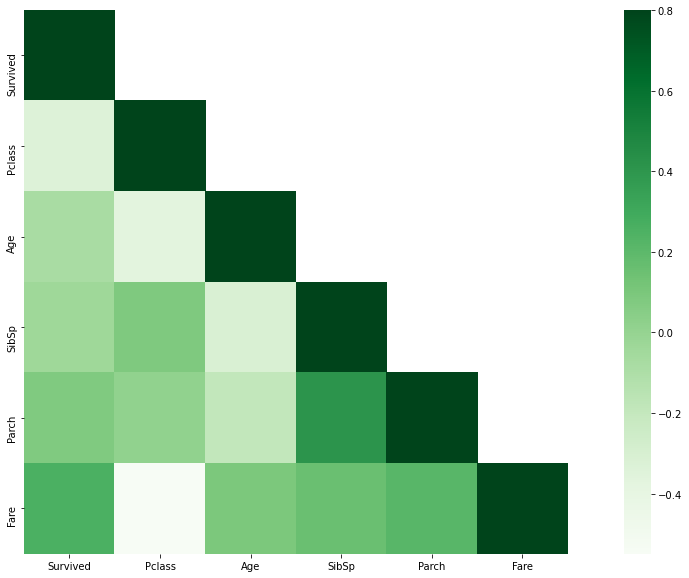

In [8]:
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, cmap="Greens", mask=mask,vmax=.8, square=True)

In [9]:
corrMatt[corrMatt > 0.6].count().sum() + corrMatt[corrMatt < -0.6].count().sum() + - corrMatt[corrMatt == 1].count().sum()

0

## Проводим обработку данных

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

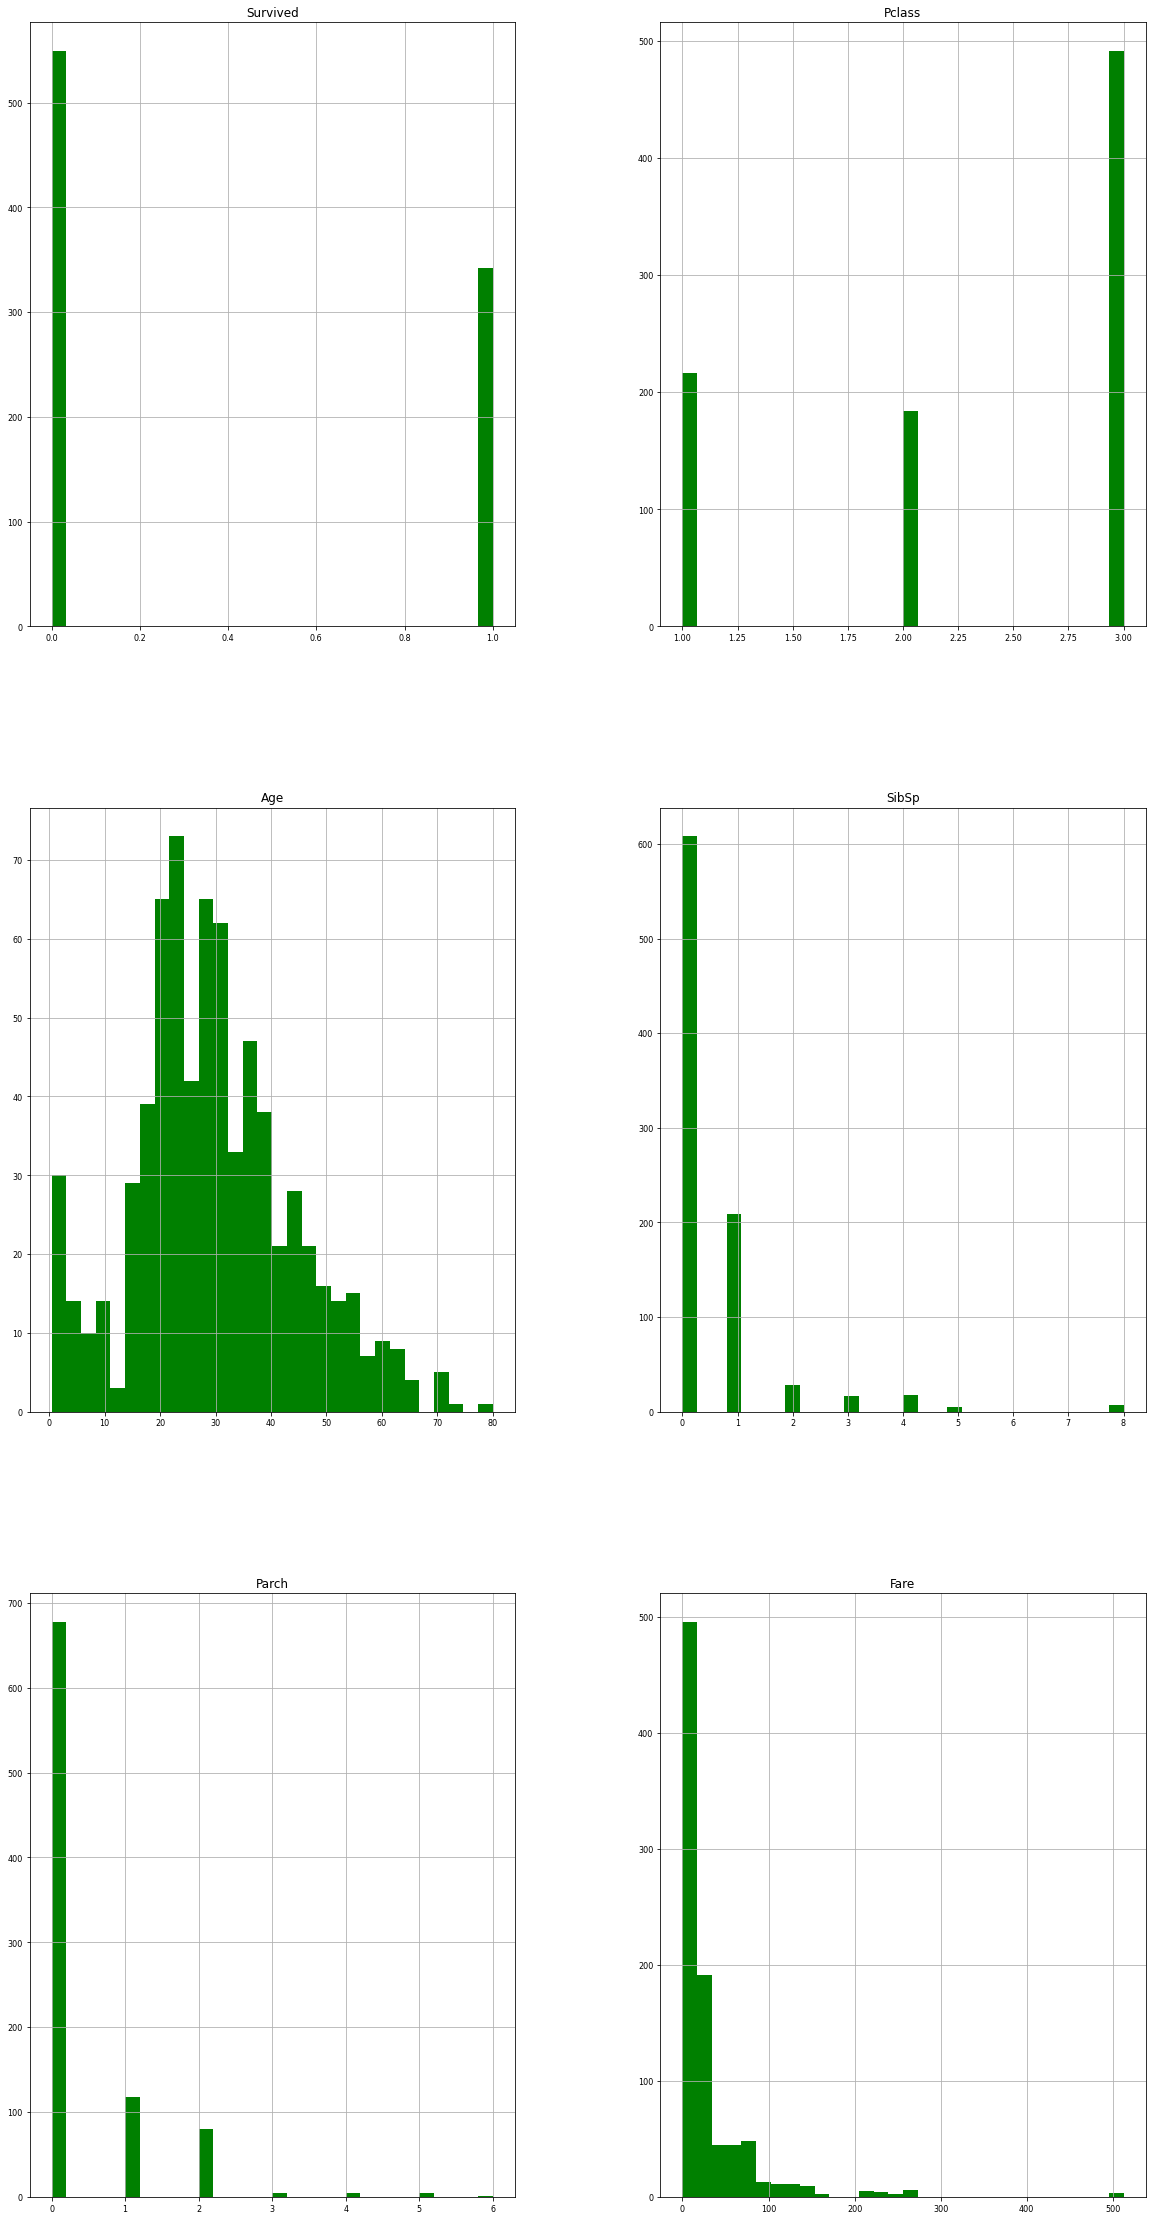

In [10]:
data[data.columns].head(1000).hist(figsize=(20, 40), color = 'g', bins=30, xlabelsize=8, ylabelsize=8)

In [11]:
data["Embarked"] = data["Embarked"].fillna("S")

In [12]:
features_to_delete = ['Cabin','Name','Ticket']
for feature in features_to_delete:
    data = data.drop(feature,1)

In [13]:
data = data.ffill().bfill()

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

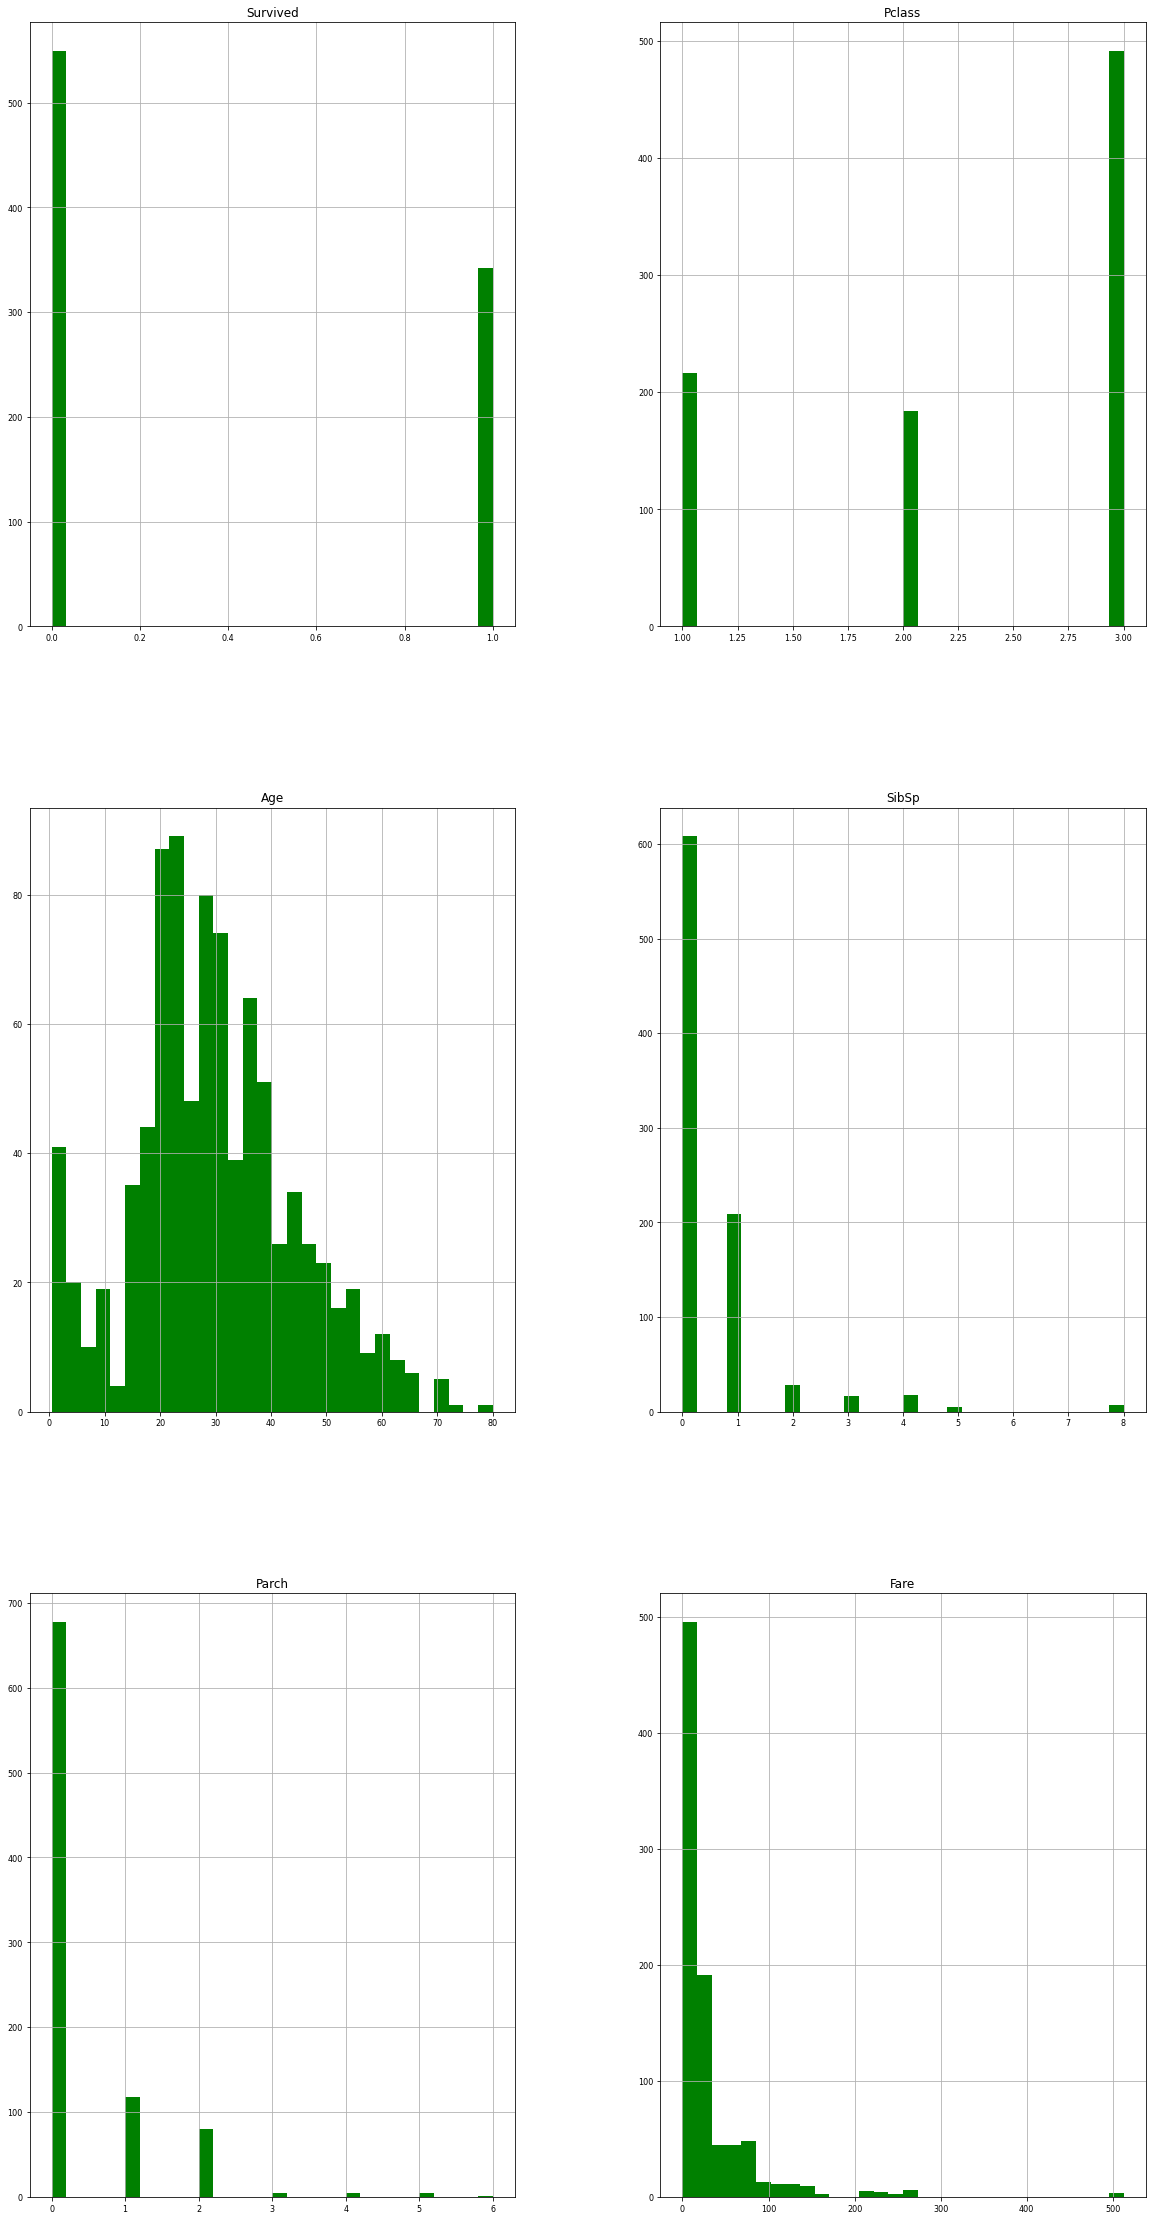

In [14]:
data[data.columns].head(1000).hist(figsize=(20, 40), color = 'g', bins=30, xlabelsize=8, ylabelsize=8)

In [15]:
for col in ['Sex','Embarked']:
    data[col] = data[col].astype("category")


data = pd.get_dummies(data, columns = (data.describe(include = "category")).columns , prefix =(data.describe(include = "category")).columns  )


In [16]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


# K-means


In [17]:
from sklearn.cluster import KMeans

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data = sc.fit_transform(data)

In [19]:
kmeans = KMeans(n_clusters = 2, random_state = 10)
clusters = kmeans.fit_predict(scaled_data)

In [20]:
len(np.unique(clusters))


2

In [21]:
data1 = data.copy()
data1["Clusters"] = clusters
data1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Clusters
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1,0
2,1,1,38.0,1,0,71.2833,1,0,1,0,0,1
3,1,3,26.0,0,0,7.9250,1,0,0,0,1,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0,1,0,0,1,0
888,1,1,19.0,0,0,30.0000,1,0,0,0,1,1
889,0,3,19.0,1,2,23.4500,1,0,0,0,1,1


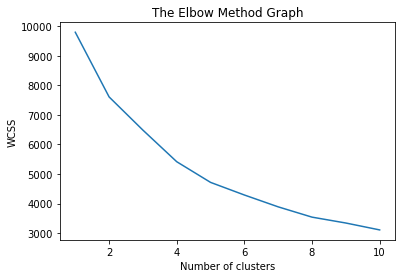

In [22]:
wcss=[]
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )

     kmeans.fit(scaled_data)

     wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## т.е мы видим что оптимально взять 2-4 кластера

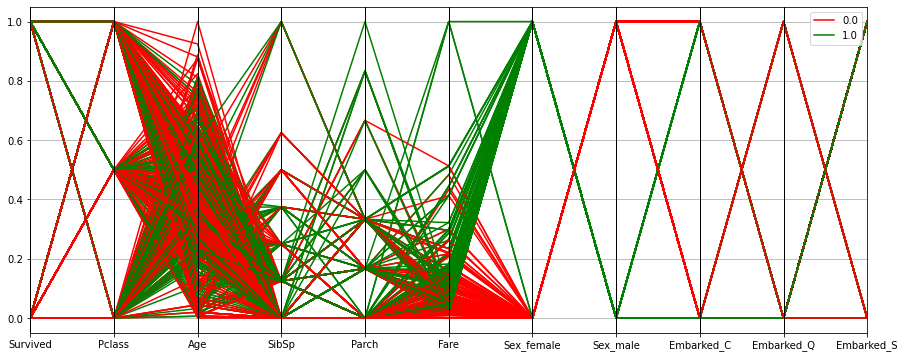

In [23]:
from pandas.plotting import parallel_coordinates


fig = plt.figure(figsize=(15,6))

normalized_df=(data1-data1.min())/(data1.max()-data1.min())
parallel_coordinates(normalized_df, 'Clusters', color=['r','g','b'])
plt.show()



In [24]:
data1[data1["Clusters"] == 0].describe()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Clusters
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.0,575.0,575.000000,575.000000,575.000000,575.0
mean,0.186087,2.394783,30.190000,0.431304,0.234783,23.830658,0.0,1.0,0.161739,0.071304,0.766957,0.0
std,0.389516,0.810842,14.788512,1.063356,0.612450,32.230567,0.0,0.0,0.368532,0.257557,0.423138,0.0
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.0,1.0,0.000000,0.000000,1.000000,0.0
50%,0.000000,3.000000,28.500000,0.000000,0.000000,10.500000,0.0,1.0,0.000000,0.000000,1.000000,0.0
75%,0.000000,3.000000,39.000000,0.000000,0.000000,26.550000,0.0,1.0,0.000000,0.000000,1.000000,0.0
max,1.000000,3.000000,80.000000,8.000000,5.000000,263.000000,0.0,1.0,1.000000,1.000000,1.000000,0.0


In [25]:
data1[data1["Clusters"] == 1].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Clusters
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.0
mean,0.743671,2.151899,28.474430,0.689873,0.648734,47.440890,0.993671,0.006329,0.237342,0.113924,0.648734,1.0
std,0.437298,0.859510,14.074639,1.154161,1.020441,68.726369,0.079429,0.079429,0.426128,0.318223,0.478123,0.0
min,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,19.000000,0.000000,0.000000,12.215625,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1.000000,2.000000,28.000000,0.000000,0.000000,23.125000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0
75%,1.000000,3.000000,38.000000,1.000000,1.000000,56.157300,1.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,1.000000,3.000000,65.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


# DBscan

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
scaled_data1 = sc.fit_transform(data)
clustering = DBSCAN(eps=4, min_samples=2).fit(scaled_data1)

data2 = data.copy()
data2["Clusters"] = clustering.labels_
data2


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Clusters
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1,0
2,1,1,38.0,1,0,71.2833,1,0,1,0,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1,0
4,1,1,35.0,1,0,53.1000,1,0,0,0,1,0
5,0,3,35.0,0,0,8.0500,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0,1,0,0,1,0
888,1,1,19.0,0,0,30.0000,1,0,0,0,1,0
889,0,3,19.0,1,2,23.4500,1,0,0,0,1,0


In [28]:
len(np.unique(clustering.labels_))


4

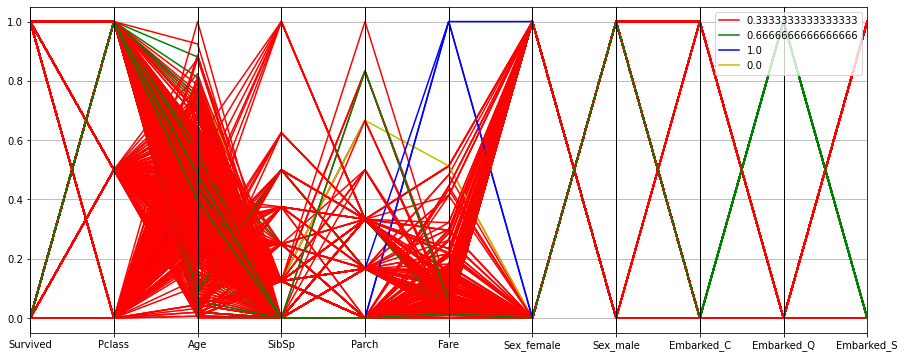

In [29]:
fig = plt.figure(figsize=(15,6))

normalized_df=(data2-data2.min())/(data2.max()-data2.min())
parallel_coordinates(normalized_df, 'Clusters', color=['r','g','b','y'])
plt.show()



In [30]:
data2[data2["Clusters"] == 0].describe()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Clusters
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.0,810.000000,810.0
mean,0.381481,2.258025,29.434778,0.533333,0.397531,31.940380,0.341975,0.658025,0.203704,0.0,0.796296,0.0
std,0.486050,0.843116,14.462831,1.116014,0.807868,41.748402,0.474664,0.474664,0.403000,0.0,0.403000,0.0
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.0,1.000000,0.0
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.245800,0.000000,1.000000,0.000000,0.0,1.000000,0.0
75%,1.000000,3.000000,38.000000,1.000000,0.750000,32.875000,1.000000,1.000000,0.000000,0.0,1.000000,0.0
max,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0


In [31]:
data2[data2["Clusters"] == 1].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Clusters
count,77.00000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77.0,77.0,77.0
mean,0.38961,2.909091,30.454545,0.428571,0.168831,13.276030,0.467532,0.532468,0.0,1.0,0.0,1.0
std,0.49086,0.369274,15.369181,0.979105,0.656999,14.188047,0.502217,0.502217,0.0,0.0,0.0,0.0
min,0.00000,1.000000,1.000000,0.000000,0.000000,6.750000,0.000000,0.000000,0.0,1.0,0.0,1.0
25%,0.00000,3.000000,19.000000,0.000000,0.000000,7.750000,0.000000,0.000000,0.0,1.0,0.0,1.0
50%,0.00000,3.000000,30.500000,0.000000,0.000000,7.750000,0.000000,1.000000,0.0,1.0,0.0,1.0
75%,1.00000,3.000000,39.000000,0.000000,0.000000,15.500000,1.000000,1.000000,0.0,1.0,0.0,1.0
max,1.00000,3.000000,70.500000,4.000000,5.000000,90.000000,1.000000,1.000000,0.0,1.0,0.0,1.0


# Hierarchical

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
scaled_data2 = sc.fit_transform(data)
clustering = AgglomerativeClustering(n_clusters=2).fit(scaled_data2)

data3 = data.copy()
data3["Clusters"] = clustering.labels_
data3


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Clusters
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1,0
4,1,1,35.0,1,0,53.1000,1,0,0,0,1,0
5,0,3,35.0,0,0,8.0500,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0,1,0,0,1,1
888,1,1,19.0,0,0,30.0000,1,0,0,0,1,0
889,0,3,19.0,1,2,23.4500,1,0,0,0,1,0


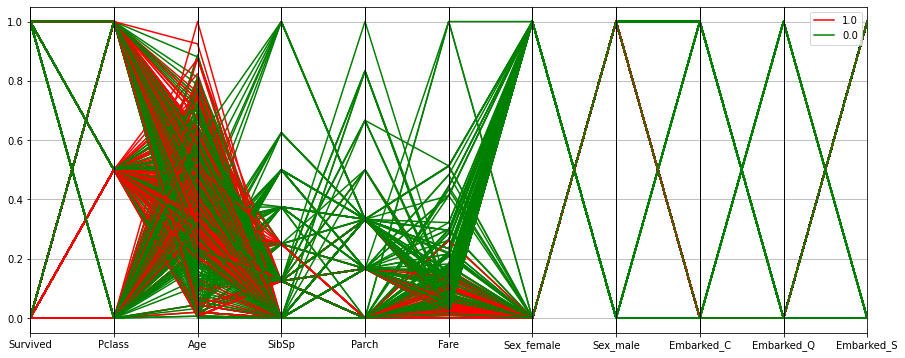

In [34]:
fig = plt.figure(figsize=(15,6))

normalized_df=(data3-data3.min())/(data3.max()-data3.min())
parallel_coordinates(normalized_df, 'Clusters', color=['r','g','b'])
plt.show()

In [35]:
data3[data3["Clusters"] == 0].describe()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Clusters
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0
mean,0.562500,2.214583,28.566854,0.777083,0.606250,44.611277,0.654167,0.345833,0.350000,0.160417,0.489583,0.0
std,0.496596,0.879953,15.127652,1.385240,0.980585,63.181081,0.476135,0.476135,0.477467,0.367375,0.500413,0.0
min,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,19.000000,0.000000,0.000000,9.587500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,3.000000,28.000000,0.000000,0.000000,23.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.000000,3.000000,38.000000,1.000000,1.000000,52.138550,1.000000,1.000000,1.000000,0.000000,1.000000,0.0
max,1.000000,3.000000,71.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [36]:
data3[data3["Clusters"] == 1].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Clusters
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.00000,411.0,411.0,411.0,411.0,411.0,411.0
mean,0.175182,2.418491,30.766618,0.226277,0.119221,17.71420,0.0,1.0,0.0,0.0,1.0,1.0
std,0.380586,0.768304,13.779230,0.483776,0.398651,17.49707,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,1.000000,0.670000,0.000000,0.000000,0.00000,0.0,1.0,0.0,0.0,1.0,1.0
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.89580,0.0,1.0,0.0,0.0,1.0,1.0
50%,0.000000,3.000000,29.000000,0.000000,0.000000,9.50000,0.0,1.0,0.0,0.0,1.0,1.0
75%,0.000000,3.000000,38.000000,0.000000,0.000000,24.86875,0.0,1.0,0.0,0.0,1.0,1.0
max,1.000000,3.000000,80.000000,2.000000,3.000000,133.65000,0.0,1.0,0.0,0.0,1.0,1.0
